## Logistic Regression

In [19]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import confusion_matrix 

In [2]:
# reading the dataset file
dataset = pd.read_csv('wdbc.dataset',header = None)

In [3]:
# mapping B as 0 and M as 1 in the dataset file
f = lambda x: 0 if x=='B' else 1
dataset[1] = dataset[1].map(f)

data = np.array(dataset)

In [4]:
np.random.shuffle(data)
#Splitting input matrix into train,validation and test set
X_train, X_valid, X_test = data[:456,2:], data[456:513,2:], data[513:,2:]

#Splitting labelled vector into train,validation and test set
Y_train, Y_valid, Y_test = data[:456,1:2], data[456:513,1:2], data[513:,1:2]

In [5]:
# Normalizing the data using feature scaling
def normalization(X):
    
    # computing normalization
    X_norm = np.linalg.norm(X, axis=1, keepdims = True);
    
    # dividing main matrix by the normalized value
    X = X / X_norm;
    
    return X

In [6]:
# Transpose of train,test and validation data after normalization
X_train = normalization(X_train)
X_valid = normalization(X_valid)
X_test = normalization(X_test)

X_t, Y_t = X_train.T, Y_train.T
X_v, Y_v = X_valid.T, Y_valid.T
X_test, Y_test = X_test.T, Y_test.T


In [7]:
# initialization of weights and bias
def initialization(X):
    w = np.random.randn(X.shape[0], 1)
    b = 0.0

    return w,b  

In [8]:
# calculating sigmoid
def sigmoid(sig):
    return 1 / (1 + np.exp(-sig))

In [9]:
# Calculate Gradient Descent

def gradient_descent(X,Y,num_iterations,learning_rate):
    global w,b
    
    cost_values = []
    
    # no of training examples
    m = X.shape[1]
    
    for i in range(num_iterations):
        
        # Forward Propogation
        a = sigmoid(np.dot(w.T,X) + b)
        
        # Cost function
        cost = -np.sum(np.multiply(np.log(a), Y) + np.multiply((1 - Y), np.log(1 - a)))/m
        cost_values.append(np.squeeze(cost))
        
        # Back Propogation
        dz = a-Y
        dw = (1 / m) * np.dot(X, dz.T)
        db = (1 / m) * np.sum(dz)
        
        # updating parameters
        w = w - learning_rate * dw
        b = b - learning_rate * db
       
        # printing cost for every 3000 iteration
        if i % 3000 == 0:
            print ("Cost after %i iteration : %f" %(i, cost))

    # plotting cost wrt to epoch
    plt.plot(cost_values)
    plt.title("Cost with respect to each iteration")
    plt.xlabel("Epoch")
    plt.ylabel("Cost")
    return cost


In [10]:
# Prediction function
def prediction(w,b,X):
    
    m = X.shape[1]

    # Initializing output prediction matrix
    Y_prediction = np.zeros((1,m))

    a =  sigmoid(np.dot(w.T,X)+ b)

    # Assigning 1 if > 0.5 otherwise 0 for prediction matrix
    for i in range(a.shape[1]):
        Y_prediction[0, i] = 1 if a[0, i] > 0.5 else 0
    
    return Y_prediction  

##### Accuracy = TP + TN / (TP + TN + FP + FN)

In [11]:
# Accuracy module
def accuracy(tn,tp,fp,fn,flag):
    if(flag == 0):
        acc = (tp + tn)/(tp + tn + fp + fn)
        print("train accuracy = ", acc*100,"%")
    if(flag == 1):
        acc = (tp + tn)/(tp + tn + fp + fn)
        print("Validation accuracy = ", acc*100,"%")
    if(flag == 2):
        acc = (tp + tn)/(tp + tn + fp + fn)
        print("Test accuracy = ", acc*100,"%")

##### Precison = TP / (TP + FP)

In [12]:
# Precision module
def precision(tn,tp,fp,fn,flag):
    if(flag == 0):
        acc = tp / (tp + fp)
        print("train precision = ", acc*100,"%")
    if(flag == 1):
        acc = tp / (tp + fp)
        print("Validation precision = ", acc*100,"%")
    if(flag == 2):
        acc = tp / (tp + fp)
        print("Test precision = ", acc*100,"%")

##### Recall = TP / (TP + FN)

In [13]:
# Recall module
def recall(tn,tp,fp,fn,flag):
    if(flag == 0):
        acc = tp / (tp + fn)
        print("train recall = ", acc*100,"%")
    if(flag == 1):
        acc = tp / (tp + fn)
        print("Validation recall = ", acc*100,"%")
    if(flag == 2):
        acc = tp / (tp + fn)
        print("Test recall = ", acc*100,"%")

In [14]:
# Calling accuracy, precision and Recall
def calc_params(confusion_matrix, flag):
    tn = confusion_matrix[0][0]
    tp = confusion_matrix[1][1]
    fp = confusion_matrix[0][1]
    fn = confusion_matrix[1][0]
    
    accuracy(tn,tp,fp,fn,flag)
    precision(tn,tp,fp,fn,flag)
    recall(tn,tp,fp,fn,flag)


In [15]:
# Model for Logistic Regression
def logistic_regression(X_train, X_valid, Y_train, Y_valid, num_iterations, learning_rate):
    
    global w,b
    
    # initialization call for w and b
    w, b = initialization(X_train)
    
    #Gradient_descent
    cost_values = gradient_descent(X_train, Y_train, num_iterations, learning_rate)
    
    # training prediction output
    Y_pred_train = prediction(w,b,X_train)
    
    # validation prediction output
    Y_pred_valid = prediction(w,b,X_valid)

    # Using confusion matrix for calculating TP,TN,FP,FN
    conf_train = confusion_matrix(Y_train[0] , Y_pred_train[0])
    conf_valid = confusion_matrix(Y_valid[0] , Y_pred_valid[0])
    
    # Calculating accuracy, precision and recall for train and validation data
    # flag = 0 for train and 1 for validation
    calc_params(conf_train,0)
    calc_params(conf_valid,1)

    
    model_data = {"costs": cost_values,
     "Y_prediction_train" : Y_pred_train, 
     "w" : w, 
     "b" : b,
     "learning_rate" : learning_rate,
     "num_iterations": num_iterations}
    
    return model_data

Cost after 0 iteration : 0.759062
Cost after 3000 iteration : 0.376925
Cost after 6000 iteration : 0.312877
Cost after 9000 iteration : 0.284549
Cost after 12000 iteration : 0.268002
Cost after 15000 iteration : 0.256921
Cost after 18000 iteration : 0.248878
train accuracy =  91.44736842105263 %
train precision =  92.40506329113924 %
train recall =  84.39306358381504 %
Validation accuracy =  91.22807017543859 %
Validation precision =  92.85714285714286 %
Validation recall =  76.47058823529412 %


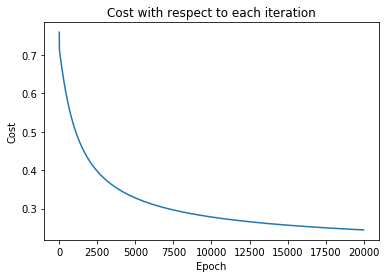

In [16]:
# Calling Model with hyperparameters
model_data = logistic_regression(X_t, X_v, Y_t, Y_v, num_iterations = 20000, learning_rate = 0.5)

In [17]:
# Testing test data
Y_pred_test = prediction(w,b,X_test)

In [18]:
# Calculating accuracy, precision and recall for test data
conf_test = confusion_matrix(Y_test[0] , Y_pred_test[0])
calc_params(conf_test,2)

Test accuracy =  91.07142857142857 %
Test precision =  94.73684210526315 %
Test recall =  81.81818181818183 %
